In [31]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import pylab as plot;
from matplotlib import pyplot as plt;
from matplotlib import style
pd.set_option('display.max_rows', 100); #increasing display of pandas packages for ease of analysis
pd.set_option('display.max_columns', 100); #increasing display of pandas packages for ease of analysis


In [90]:
train_data = pd.read_csv('./data/train.csv');

In [7]:
train_data.shape

(891, 12)

In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_1,percent_2], axis=1, keys = ['Total', '%-1', '%-2'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [26]:
missing_data

,Total,%-1,%-2
Age,177,19.865320,19.9
Cabin,687,77.104377,77.1
Embarked,2,0.224467,0.2
Fare,0,0.000000,0.0
Name,0,0.000000,0.0
Parch,0,0.000000,0.0
PassengerId,0,0.000000,0.0
Pclass,0,0.000000,0.0
Sex,0,0.000000,0.0
SibSp,0,0.000000,0.0


In [28]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Male')

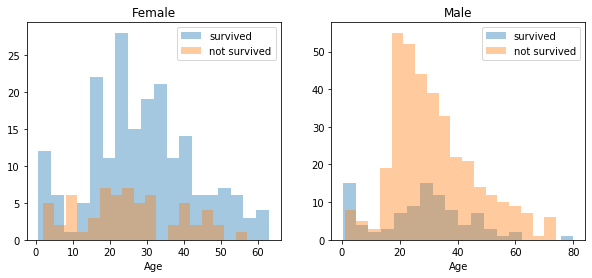

In [34]:
survived = 'survived'
not_survived = 'not survived'

fig,axes = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
women = train_data[train_data['Sex'] == 'female']
men = train_data[train_data['Sex'] == 'male']
ax = sns.distplot(women[women['Survived'] == 1]['Age'].dropna(), bins=18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived'] == 0]['Age'].dropna(), bins=18, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived'] == 1]['Age'].dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived'] == 0]['Age'].dropna(), bins=18, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


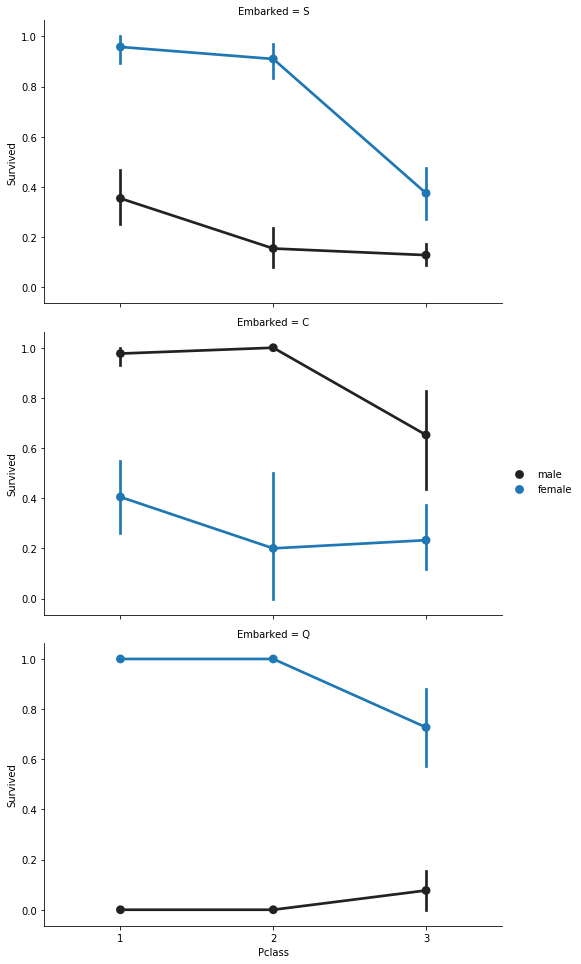

In [36]:
FacetGrid = sns.FacetGrid(train_data, row = 'Embarked', size = 4.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

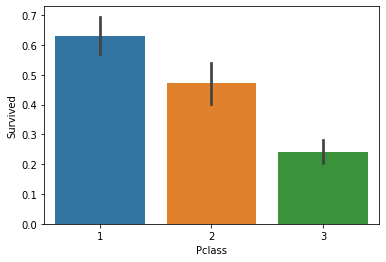

In [37]:
sns.barplot(x='Pclass', y = 'Survived', data=train_data)

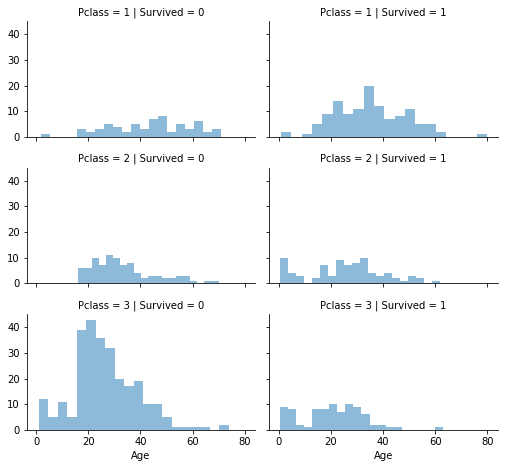

In [39]:

grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()


/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


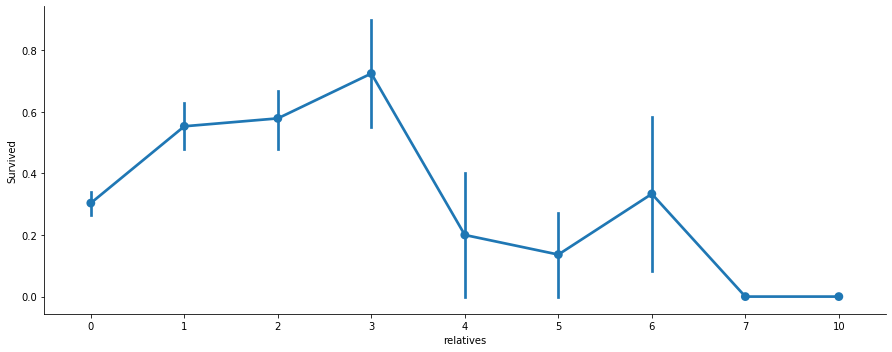

In [42]:
axes = sns.factorplot('relatives','Survived', data = train_data, aspect = 2.5)

0      0
1      2
2      0
3      2
4      1
      ..
886    2
887    4
888    0
889    4
890    0
Name: Fare_Per_Person, Length: 891, dtype: int64

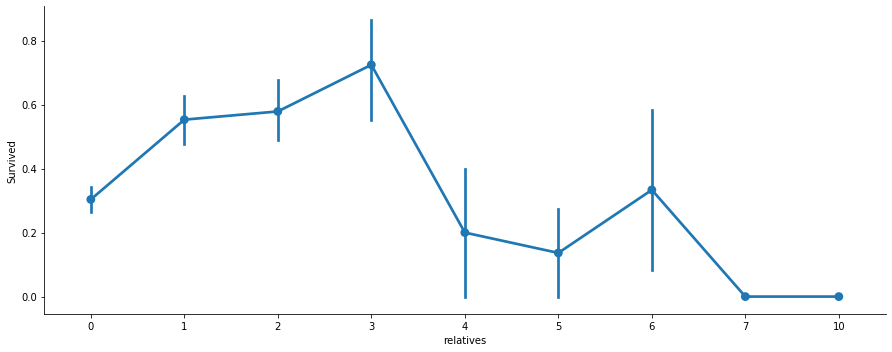

In [91]:

train_data['relatives'] = train_data['SibSp'] + train_data['Parch']
train_data.loc[train_data['relatives'] > 0, 'not_alone'] = 0
train_data.loc[train_data['relatives'] == 0, 'not_alone'] = 1
train_data['not_alone'] = train_data['not_alone'].astype(int)

train_data['not_alone'].value_counts()



axes = sns.factorplot('relatives','Survived', data = train_data, aspect = 2.5)


#Step 11: extract deck number from Cabin

import re

deck = {"A" : 1, "B" : 2, "C":3,'D':4,'E':5,'F':6, 'G':7, 'U': 8}
train_data['Cabin'] = train_data['Cabin'].fillna("U0")
train_data['Deck'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_data['Deck'] = train_data['Deck'].map(deck)
train_data['Deck'] = train_data['Deck'].fillna(0)
train_data['Deck'] = train_data['Deck'].astype(int)

train_data = train_data.drop(['Cabin'],axis=1)


# Step 12: create an array that contains random numbers, computed based on the mean age value in regards to the standard deviation and is null

mean_age = train_data['Age'].mean()
std_age = train_data['Age'].std()
isnull_age = train_data['Age'].isnull().sum()

rand_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = isnull_age)
age_slice = train_data['Age'].copy()
age_slice[np.isnan(age_slice)] = rand_age
train_data['Age'] = age_slice
train_data['Age'] = train_data['Age'].astype(int)


# Step 13: fill in missing 'Embarked' with most common value

train_data['Embarked'].describe()

common_value = 'S'

train_data['Embarked'] = train_data['Embarked'].fillna(common_value)


# Step 14: more data processing


train_data['Fare'] = train_data['Fare'].fillna(0)
train_data['Fare'] = train_data['Fare'].astype(int)


titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].map(titles)
train_data['Title'] = train_data['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis = 1)

genders = {'male' :0, 'female':1}
train_data['Sex'] = train_data['Sex'].map(genders)

train_data = train_data.drop(['Ticket'], axis = 1)

ports = {'S':0, 'C':1, 'Q':2}
train_data['Embarked'] = train_data['Embarked'].map(ports)


# Step 15: Creating Categories

# Age Category

train_data['Age'] = train_data['Age'].astype(int)
train_data.loc[ train_data['Age'] <= 11, 'Age'] = 0
train_data.loc[(train_data['Age'] > 11) & (train_data['Age'] <= 18), 'Age'] = 1
train_data.loc[(train_data['Age'] > 18) & (train_data['Age'] <= 22), 'Age'] = 2
train_data.loc[(train_data['Age'] > 22) & (train_data['Age'] <= 27), 'Age'] = 3
train_data.loc[(train_data['Age'] > 27) & (train_data['Age'] <= 33), 'Age'] = 4
train_data.loc[(train_data['Age'] > 33) & (train_data['Age'] <= 40), 'Age'] = 5
train_data.loc[(train_data['Age'] > 40) & (train_data['Age'] <= 66), 'Age'] = 6
train_data.loc[ train_data['Age'] > 66, 'Age'] = 6

# Fare Categories

pd.qcut(train_data['Fare'], 6)

train_data.loc[ train_data['Fare'] <= 7.0, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7) & (train_data['Fare'] <= 8), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 8) & (train_data['Fare'] <= 14), 'Fare']   = 2
train_data.loc[(train_data['Fare'] > 14) & (train_data['Fare'] <= 26), 'Fare']   = 3
train_data.loc[(train_data['Fare'] > 26) & (train_data['Fare'] <= 52), 'Fare']   = 4
train_data.loc[ train_data['Fare'] > 52, 'Fare'] = 5
train_data['Fare'] = train_data['Fare'].astype(int)

train_data.Fare.value_counts()

# Age * Class

train_data['Age_Class'] = train_data['Age']*train_data['Pclass']

# Fare per person

train_data['Fare_Per_Person'] = train_data['Fare']/(train_data['relatives']+1)
train_data['Fare_Per_Person'].astype(int)


In [105]:
####################
####TRAIN MODELS####
####################


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [135]:
x = train_data.drop(['Survived'],axis = 1)
y = train_data['Survived']

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [137]:
# Stochastic Gradient Descent (SGD)

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)

sgd.score(x_test, y_test)
acc_sgd = round(sgd.score(x_test, y_test)*100,2) 


# Random Forest:

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)

random_forest.score(x_test, y_test)
acc_random_forest = round(random_forest.score(x_test,y_test)*100,2)

# Logistic Regression:

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

logreg_pred = logreg.predict(x_test)

acc_logreg = round(logreg.score(x_test, y_test)*100,2)

#K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

acc_knn = round(knn.score(x_train, y_train)*100, 2)

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

gaussian_pred = gaussian.predict(x_test)

acc_gaussian = round(gaussian.score(x_test, y_test)*100,2)

# Perceptron

perceptron = Perceptron(max_iter = 5)
perceptron.fit(x_train,y_train)

perceptrion_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_test, y_test)*100,2)

# Linear Support Vector Machine

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

linear_svc_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_test, y_test)*100, 2)

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree.pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_test, y_test)*100,2)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [138]:
results = pd.DataFrame({
	'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Decision Tree'],
	'Score' : [acc_linear_svc, acc_knn, acc_logreg, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]
	})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
81.17,Random Forest
79.82,Logistic Regression
78.92,Decision Tree
78.89,KNN
75.78,Naive Bayes
74.44,Support Vector Machines
68.16,Perceptron
33.63,Stochastic Gradient Decent


In [128]:
# K_Fold Cross Validation

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = 'accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.85294118 0.75       0.76119403 0.85074627 0.7761194  0.85074627
 0.83333333 0.8030303  0.81818182 0.84848485]
Mean: 0.8144777449650145
Standard Deviation: 0.03772919806211794


In [130]:

importances = pd.DataFrame({'feature':x_train.columns, 'importance': np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

importances

,importance
feature,
PassengerId,0.217
Sex,0.165
Title,0.143
Age_Class,0.072
Fare_Per_Person,0.065
Fare,0.064
Age,0.059
Pclass,0.056
Deck,0.040


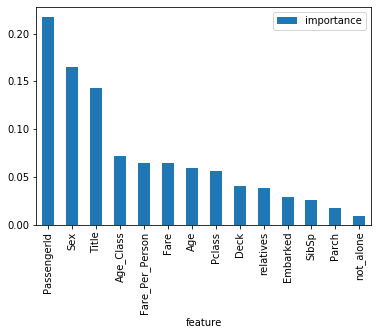

In [139]:
importances.plot.bar()

In [140]:
x_test2 = x_test.drop(['Parch','not_alone'], axis=1)
x_train2 = x_train.drop(['Parch','not_alone'],axis=1)

In [142]:

random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(x_train2, y_train)
random_forest_2_pred = random_forest.predict(x_test2)

acc_random_forest = round(random_forest.score(x_test2, y_test)*100,2)
print(round(acc_random_forest,2),"%")

81.61 %
